In [2]:
# make list of all files in olmes_results/tulu
import os
import sys
import re
import json

path = "olmes_results/tulu"
files = os.listdir(path)
metrics = []
for f in files:
    # if contains 'metric', print
    if re.search("metric", f):
        metrics.append(f)
metrics = sorted(metrics)
# load first file in list
scores = []
for f in metrics:
    print(f)
    json_file = open(path + "/" + f, "r")
    data = json.load(json_file)
    score = data["metrics"]["primary_score"]
    print(score)
    scores.append(score)
print(scores)
# print average
print(sum(scores)/len(scores))

task-000-minerva_math_algebra-metrics.json
0.506318449873631
task-001-minerva_math_counting_and_probability-metrics.json
0.2911392405063291
task-002-minerva_math_geometry-metrics.json
0.21294363256784968
task-003-minerva_math_intermediate_algebra-metrics.json
0.12513842746400886
task-004-minerva_math_number_theory-metrics.json
0.22777777777777777
task-005-minerva_math_prealgebra-metrics.json
0.5315729047072331
task-006-minerva_math_precalculus-metrics.json
0.12637362637362637
[0.506318449873631, 0.2911392405063291, 0.21294363256784968, 0.12513842746400886, 0.22777777777777777, 0.5315729047072331, 0.12637362637362637]
0.28875200846720794


In [1]:
import re
import shutil
import csv
from huggingface_hub import list_repo_refs
from transformers import AutoModelForCausalLM, AutoTokenizer

out = list_repo_refs("allenai/OLMo-2-1124-7B")
branches = [b.name for b in out.branches]

all_branches_stage1 = [branch for branch in branches if 'stage2' not in branch][1:]

def extract_step(branch_name):
    match = re.search(r'step(\d+)', branch_name)
    return int(match.group(1)) if match else float('inf')

branches_stage1 = sorted(all_branches_stage1, key=extract_step)
# for branch in branches_stage1_healed_sorted:
#     print(branch)
len(branches_stage1)

928

Outliers (Step, Tokens):
we have 393 outliers
(inf, 412)
(198000, 802)
(191000, 781)
(186000, 735)
(175000, 424)
(732000, 3075)
(733000, 3079)
(734000, 3083)
(735000, 3088)
(736000, 3092)
(737000, 3096)
(738000, 3100)
(739000, 3104)
(740000, 3108)
(741000, 3113)
(742000, 3117)
(743000, 3121)
(744000, 3125)
(745000, 3129)
(746000, 3134)
(747000, 3138)
(748000, 3142)
(749000, 3146)
(750000, 3150)
(751000, 3155)
(752000, 3159)
(753000, 3163)
(754000, 3167)
(755000, 3171)
(756000, 3176)
(757000, 3180)
(758000, 3184)
(759000, 3188)
(760000, 3192)
(761000, 3197)
(762000, 3201)
(763000, 3205)
(764000, 3209)
(765000, 3213)
(766000, 3218)
(767000, 3222)
(768000, 3226)
(769000, 3230)
(770000, 3234)
(771000, 3239)
(772000, 3243)
(773000, 3247)
(774000, 3251)
(775000, 3255)
(776000, 3259)
(777000, 3264)
(778000, 3268)
(779000, 3272)
(780000, 3276)
(781000, 3280)
(782000, 3285)
(783000, 3289)
(784000, 3293)
(785000, 3297)
(786000, 3301)
(787000, 3306)
(788000, 3310)
(789000, 3314)
(790000, 3318)
(7

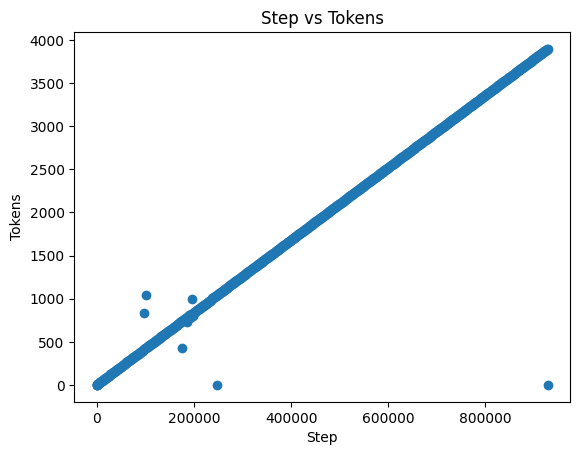

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

steps = [extract_step(branch) for branch in branches_stage1]
tokens = [int(match.group(1)) for branch in branches_stage1 if (match := re.search(r'tokens(\d+)', branch))]

# Calculate Z-scores
z_scores = zscore(tokens)

# Define a threshold for identifying outliers
threshold = 1

# Identify outliers
outliers = [(step, token) for step, token, z in zip(steps[:len(tokens)], tokens, z_scores) if abs(z) > threshold]

# Print out the outliers
print("Outliers (Step, Tokens):")
print(f"we have {len(outliers)} outliers")
for outlier in outliers:
    print(outlier)

# Plot the data
plt.plot(steps[:len(tokens)], tokens, 'o')
plt.xlabel('Step')
plt.ylabel('Tokens')
plt.title('Step vs Tokens')
plt.show()


# OLMo-2 base vs. instruct!

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer, GenerationConfig
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn

# model_id = "Neelectric/OLMo-2-1124-7B_MATH"
# model_id = "allenai/OLMo-2-1124-7B"
model_id = "allenai/OLMo-2-1124-7B-Instruct"
# model_id = "meta-llama/Llama-2-7b-hf"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    # "sfttrainer_outputdir/",
    device_map="auto",
    torch_dtype=torch.bfloat16,
    )

tokenizer = AutoTokenizer.from_pretrained(model_id)
math_dataset = load_dataset("lighteval/MATH", split="test")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
instance = math_dataset[0]
problem = instance['problem']
solution = instance['solution']
print(instance, "\n\n\n")
print(problem)
print(solution)

{'problem': 'How many vertical asymptotes does the graph of $y=\\frac{2}{x^2+x-6}$ have?', 'level': 'Level 3', 'type': 'Algebra', 'solution': 'The denominator of the rational function factors into $x^2+x-6=(x-2)(x+3)$. Since the numerator is always nonzero, there is a vertical asymptote whenever the denominator is $0$, which occurs for $x = 2$ and $x = -3$.  Therefore, the graph has $\\boxed{2}$ vertical asymptotes.'} 



How many vertical asymptotes does the graph of $y=\frac{2}{x^2+x-6}$ have?
The denominator of the rational function factors into $x^2+x-6=(x-2)(x+3)$. Since the numerator is always nonzero, there is a vertical asymptote whenever the denominator is $0$, which occurs for $x = 2$ and $x = -3$.  Therefore, the graph has $\boxed{2}$ vertical asymptotes.


In [7]:
chat = [
        {"role": "user", "content": instance['problem']},
        # {"role": "assistant", "content": first_instance['solution']}
        ]
templated = tokenizer.apply_chat_template(chat, tokenize=False)
inputs = tokenizer(templated, return_tensors='pt')
streamer = TextStreamer(tokenizer)
inputs

{'input_ids': tensor([[100257,     27,     91,    882,     91,     29,    198,   4438,   1690,
          12414,  97354,   6429,   1587,    279,   4876,    315,    400,     88,
          35533,  38118,     90,     17,  15523,     87,     61,     17,     10,
             87,     12,     21,  32816,    617,     30,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [9]:
generation_config = GenerationConfig(do_sample=False, max_new_tokens=500,)
_ = model.generate(**inputs, streamer=streamer, generation_config=generation_config)

<|endoftext|><|user|>
How many vertical asymptotes does the graph of $y=\frac{2}{x^2+x-6}$ have?
To determine the number of vertical asymptotes for the function \( y = \frac{2}{x^2 + x - 6} \), we need to find the values of \( x \) that make the denominator zero, since vertical asymptotes occur where the function approaches infinity (i.e., where the denominator is zero and the numerator is non-zero).

The denominator is \( x^2 + x - 6 \). We need to solve the equation:
\[ x^2 + x - 6 = 0 \]

Let's solve this quadratic equation step-by-step.

1. **Identify the coefficients:**
   - \( a = 1 \)
   - \( b = 1 \)
   - \( c = -6 \)

2. **Use the quadratic formula:**
   The quadratic formula is given by:
   \[
   x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
   \]

3. **Calculate the discriminant:**
   \[
   b^2 - 4ac = 1^2 - 4 \cdot 1 \cdot (-6) = 1 + 24 = 25
   \]

4. **Solve for \( x \):**
   \[
   x = \frac{-1 \pm \sqrt{25}}{2 \cdot 1} = \frac{-1 \pm 5}{2}
   \]

   This gives us two solutions:


In [3]:
# lets actually dig into the parameters and print some summary statistics about the model weights
params = model.parameters()
# for example, for every layer, it would be cool to see the mean and std of the weights per attention and feedforward module

# lets iterate through all layers, calculate the mean and std of the attention and feedforward weights, and graph them
# lets start with only the query vectors of self_attn, and gate_proj of mlp.
# i want a plot where they are graphed across layers. layers should increase across y axis, and x axis shows name of module. 
# colour indicates mean



In [4]:
model

Olmo2ForCausalLM(
  (model): Olmo2Model(
    (embed_tokens): Embedding(100352, 4096, padding_idx=100277)
    (layers): ModuleList(
      (0-31): 32 x Olmo2DecoderLayer(
        (self_attn): Olmo2SdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): Olmo2RotaryEmbedding()
          (q_norm): Olmo2RMSNorm((4096,), eps=1e-06)
          (k_norm): Olmo2RMSNorm((4096,), eps=1e-06)
        )
        (mlp): Olmo2MLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (post_attention

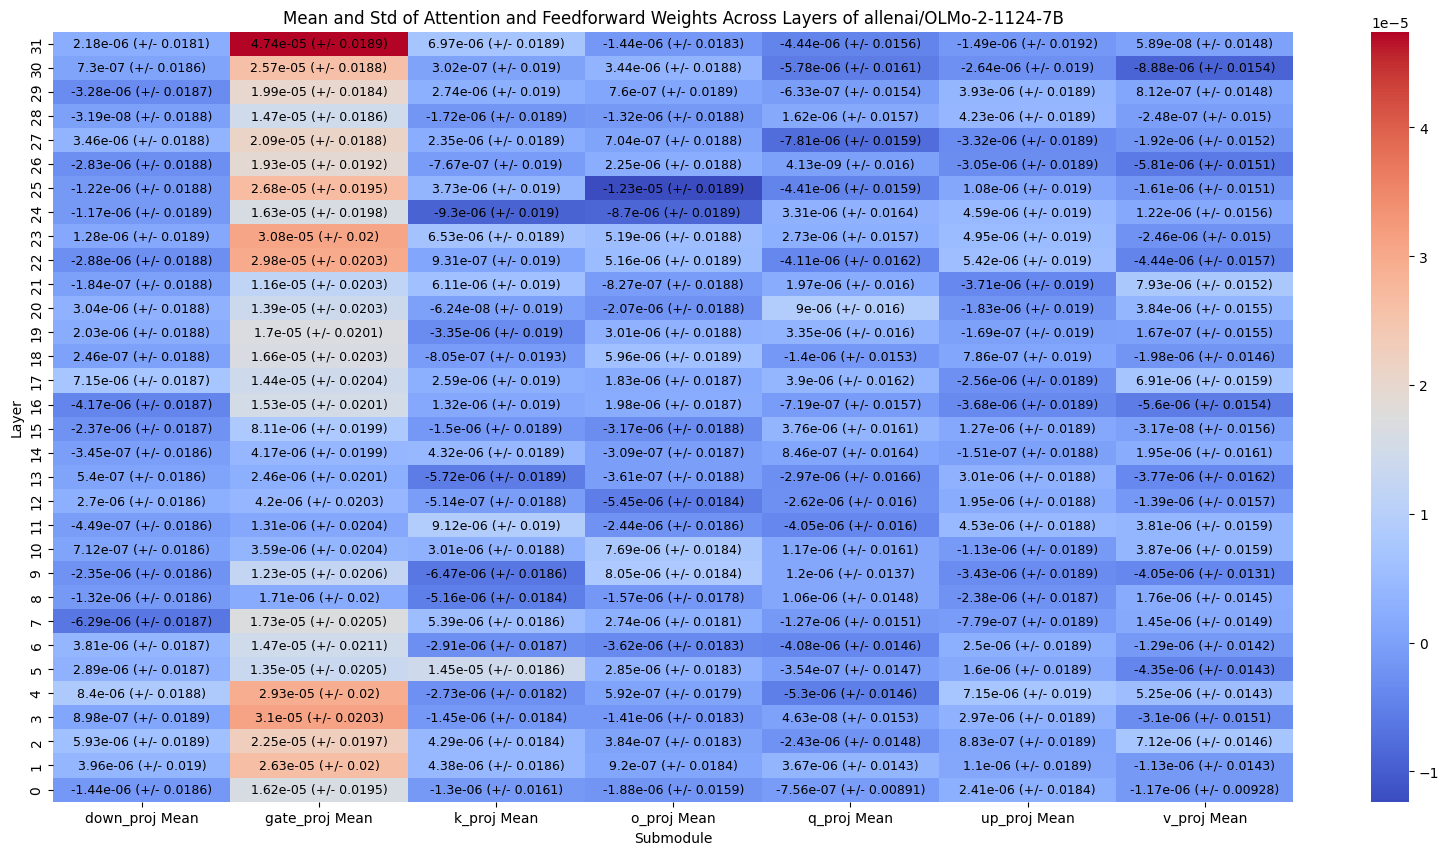

In [5]:
import pandas as pd
import seaborn as sns


means = []
stds = []

for layer_num, layer in enumerate(model.model.layers):
    # lets get the attention weights
    q_proj_weight = layer.self_attn.q_proj.weight
    k_proj_weight = layer.self_attn.k_proj.weight
    v_proj_weight = layer.self_attn.v_proj.weight
    o_proj_weight = layer.self_attn.o_proj.weight
    # lets get the feedforward weights
    gate_proj_weight = layer.mlp.gate_proj.weight
    up_proj_weight = layer.mlp.up_proj.weight
    down_proj_weight = layer.mlp.down_proj.weight

    q_proj_mean = q_proj_weight.mean().item()
    q_proj_std = q_proj_weight.std().item()
    k_proj_mean = k_proj_weight.mean().item()
    k_proj_std = k_proj_weight.std().item()
    v_proj_mean = v_proj_weight.mean().item()
    v_proj_std = v_proj_weight.std().item()
    o_proj_mean = o_proj_weight.mean().item()
    o_proj_std = o_proj_weight.std().item()

    gate_proj_mean = gate_proj_weight.mean().item()
    gate_proj_std = gate_proj_weight.std().item()
    up_proj_mean = up_proj_weight.mean().item()
    up_proj_std = up_proj_weight.std().item()
    down_proj_mean = down_proj_weight.mean().item()
    down_proj_std = down_proj_weight.std().item()

    means.append([q_proj_mean, v_proj_mean, k_proj_mean, o_proj_mean, gate_proj_mean, up_proj_mean, down_proj_mean])
    stds.append([q_proj_std, v_proj_std, k_proj_std, o_proj_std, gate_proj_std, up_proj_std, down_proj_std])


# lets plot this
means = np.array(means)
stds = np.array(stds)
# lets plot the means
data = []
for layer_num, (q_proj_mean, k_proj_mean, v_proj_mean, o_proj_mean, gate_proj_mean, up_proj_mean, down_proj_mean, q_proj_std, k_proj_std, v_proj_std, o_proj_std, gate_proj_std, up_proj_std, down_proj_std) in enumerate(zip(means[:, 0], means[:, 1], means[:, 2], means[:, 3], means[:, 4], means[:, 5], means[:, 6], stds[:, 0], stds[:, 1], stds[:, 2], stds[:, 3], stds[:, 4], stds[:, 5], stds[:, 6])):
    data.append([layer_num, 'q_proj Mean', q_proj_mean])
    data.append([layer_num, 'k_proj Mean', k_proj_mean])
    data.append([layer_num, 'v_proj Mean', v_proj_mean])
    data.append([layer_num, 'o_proj Mean', o_proj_mean])
    data.append([layer_num, 'gate_proj Mean', gate_proj_mean])
    data.append([layer_num, 'up_proj Mean', up_proj_mean])
    data.append([layer_num, 'down_proj Mean', down_proj_mean])
    data.append([layer_num, 'q_proj Std', q_proj_std])
    data.append([layer_num, 'k_proj Std', k_proj_std])
    data.append([layer_num, 'v_proj Std', v_proj_std])
    data.append([layer_num, 'o_proj Std', o_proj_std])
    data.append([layer_num, 'gate_proj Std', gate_proj_std])
    data.append([layer_num, 'up_proj Std', up_proj_std])
    data.append([layer_num, 'down_proj Std', down_proj_std])

# Convert to a DataFrame
df = pd.DataFrame(data, columns=['Layer', 'Submodule', 'Value'])
pivot_df = df.pivot(index='Layer', columns='Submodule', values='Value')

# Reverse the order of the layers
pivot_df = pivot_df.iloc[::-1]
# Combine mean and std into a single string
pivot_df_combined = pivot_df.copy()
for submodule in ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']:
    pivot_df_combined[f'{submodule} Mean'] = pivot_df[f'{submodule} Mean'].astype(str) + ' (+/- ' + pivot_df[f'{submodule} Std'].astype(str) + ')'

# Drop the std columns
pivot_df_combined = pivot_df_combined.drop(columns=[f'{submodule} Std' for submodule in ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']])

# Plot the data
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_df.drop(columns=[f'{submodule} Std' for submodule in ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']]), annot=False, cmap='coolwarm', cbar=True)
plt.title('Mean and Std of Attention and Feedforward Weights Across Layers of ' + model_id)
plt.xlabel('Submodule')

# Format the text to show only 3 significant figures
for y in range(pivot_df_combined.shape[0]):
    for x in range(pivot_df_combined.shape[1]):
        text = pivot_df_combined.iloc[y, x]
        mean, std = text.split(' (+/- ')
        mean = float(mean)
        std = float(std[:-1])
        formatted_text = f'{mean:.3g} (+/- {std:.3g})'
        plt.text(x + 0.5, y + 0.5, formatted_text,
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=9, color='black')
        
ax=plt.gca()
plt.ylabel('Layer')
plt.savefig('figures/summary_stats/' + model_id + '.pdf')
plt.show()

In [6]:
# now that we have calulated summary stats for the base model, lets do the same for the finetuned model, and plot the differences (this time only the means)
finetuned_model_id = "allenai/OLMo-2-1124-7B-Instruct"
finetuned_model = AutoModelForCausalLM.from_pretrained(
    finetuned_model_id,
    # "sfttrainer_outputdir/",
    device_map="auto",
    torch_dtype=torch.bfloat16,
    )

Loading checkpoint shards: 100%|██████████| 3/3 [00:05<00:00,  1.85s/it]


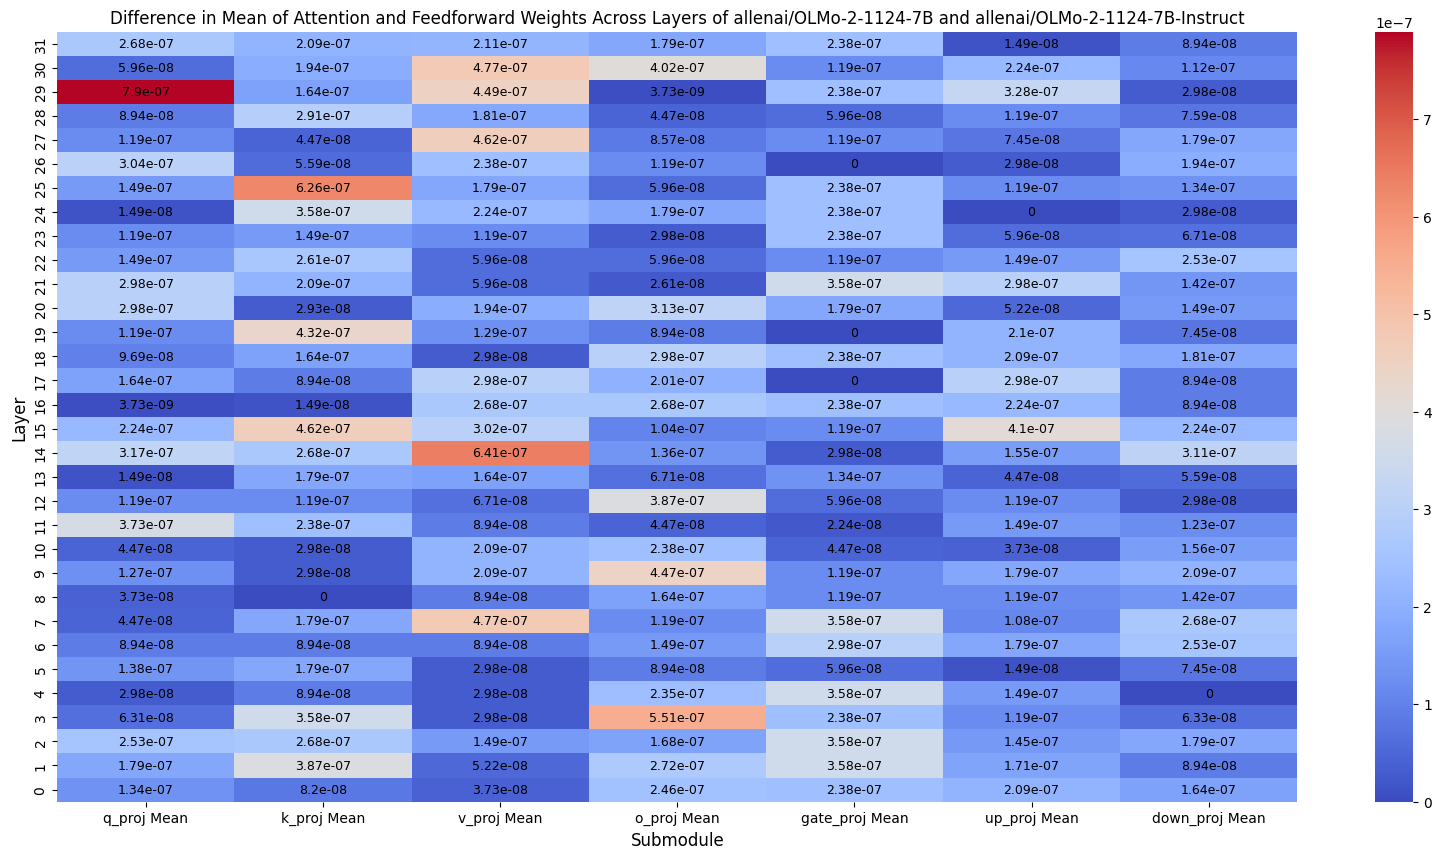

In [12]:
finetuned_means = []

for layer_num, layer in enumerate(finetuned_model.model.layers):
    # lets get the attention weights
    q_proj_weight = layer.self_attn.q_proj.weight
    k_proj_weight = layer.self_attn.k_proj.weight
    v_proj_weight = layer.self_attn.v_proj.weight
    o_proj_weight = layer.self_attn.o_proj.weight
    # lets get the feedforward weights
    gate_proj_weight = layer.mlp.gate_proj.weight
    up_proj_weight = layer.mlp.up_proj.weight
    down_proj_weight = layer.mlp.down_proj.weight

    q_proj_mean = q_proj_weight.mean().item()
    q_proj_std = q_proj_weight.std().item()
    k_proj_mean = k_proj_weight.mean().item()
    k_proj_std = k_proj_weight.std().item()
    v_proj_mean = v_proj_weight.mean().item()
    v_proj_std = v_proj_weight.std().item()
    o_proj_mean = o_proj_weight.mean().item()
    o_proj_std = o_proj_weight.std().item()

    gate_proj_mean = gate_proj_weight.mean().item()
    gate_proj_std = gate_proj_weight.std().item()
    up_proj_mean = up_proj_weight.mean().item()
    up_proj_std = up_proj_weight.std().item()
    down_proj_mean = down_proj_weight.mean().item()
    down_proj_std = down_proj_weight.std().item()

    finetuned_means.append([q_proj_mean, v_proj_mean, k_proj_mean, o_proj_mean, gate_proj_mean, up_proj_mean, down_proj_mean])


finetuned_means = np.array(finetuned_means)
# lets plot the differences
finetuned_data = []
for layer_num, (q_proj_mean, k_proj_mean, v_proj_mean, o_proj_mean, gate_proj_mean, up_proj_mean, down_proj_mean) in enumerate(zip(finetuned_means[:, 0], finetuned_means[:, 1], finetuned_means[:, 2], finetuned_means[:, 3], finetuned_means[:, 4], finetuned_means[:, 5], finetuned_means[:, 6])):
    finetuned_data.append([layer_num, 'q_proj Mean', q_proj_mean])
    finetuned_data.append([layer_num, 'k_proj Mean', k_proj_mean])
    finetuned_data.append([layer_num, 'v_proj Mean', v_proj_mean])
    finetuned_data.append([layer_num, 'o_proj Mean', o_proj_mean])
    finetuned_data.append([layer_num, 'gate_proj Mean', gate_proj_mean])
    finetuned_data.append([layer_num, 'up_proj Mean', up_proj_mean])
    finetuned_data.append([layer_num, 'down_proj Mean', down_proj_mean])



# Convert to a DataFrame
finetuned_df = pd.DataFrame(finetuned_data, columns=['Layer', 'Submodule', 'Value'])
finetuned_pivot_df = finetuned_df.pivot(index='Layer', columns='Submodule', values='Value')

# Reverse the order of the layers
finetuned_pivot_df = finetuned_pivot_df.iloc[::-1]
# now use pivot_df and finetuned_pivot_df to calculate the differences

# drop the stds in the pivot_df
pivot_df_no_stds = pivot_df.drop(columns=[f'{submodule} Std' for submodule in ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']])
diff_pivot_df = abs(pivot_df_no_stds - finetuned_pivot_df)

# Reorder the columns to follow the qkvo gdu format
column_order = ['q_proj Mean', 'k_proj Mean', 'v_proj Mean', 'o_proj Mean', 'gate_proj Mean', 'up_proj Mean', 'down_proj Mean']
diff_pivot_df = diff_pivot_df[column_order]

# Plot the data
plt.figure(figsize=(20, 10))
sns.heatmap(diff_pivot_df, annot=False, cmap='coolwarm', cbar=True)
plt.title('Difference in Mean of Attention and Feedforward Weights Across Layers of ' + model_id + ' and ' + finetuned_model_id)

# Format the text to show only 3 significant figures
for y in range(diff_pivot_df.shape[0]):
    for x in range(diff_pivot_df.shape[1]):
        text = diff_pivot_df.iloc[y, x]
        mean = text
        formatted_text = f'{mean:.3g}'
        plt.text(x + 0.5, y + 0.5, formatted_text,
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=9, color='black')
        
ax=plt.gca()
plt.xlabel('Submodule', fontsize=12)
plt.ylabel('Layer', fontsize=12)
plt.savefig('figures/summary_stats/' + model_id + '_vs_instruct.pdf')
plt.show()

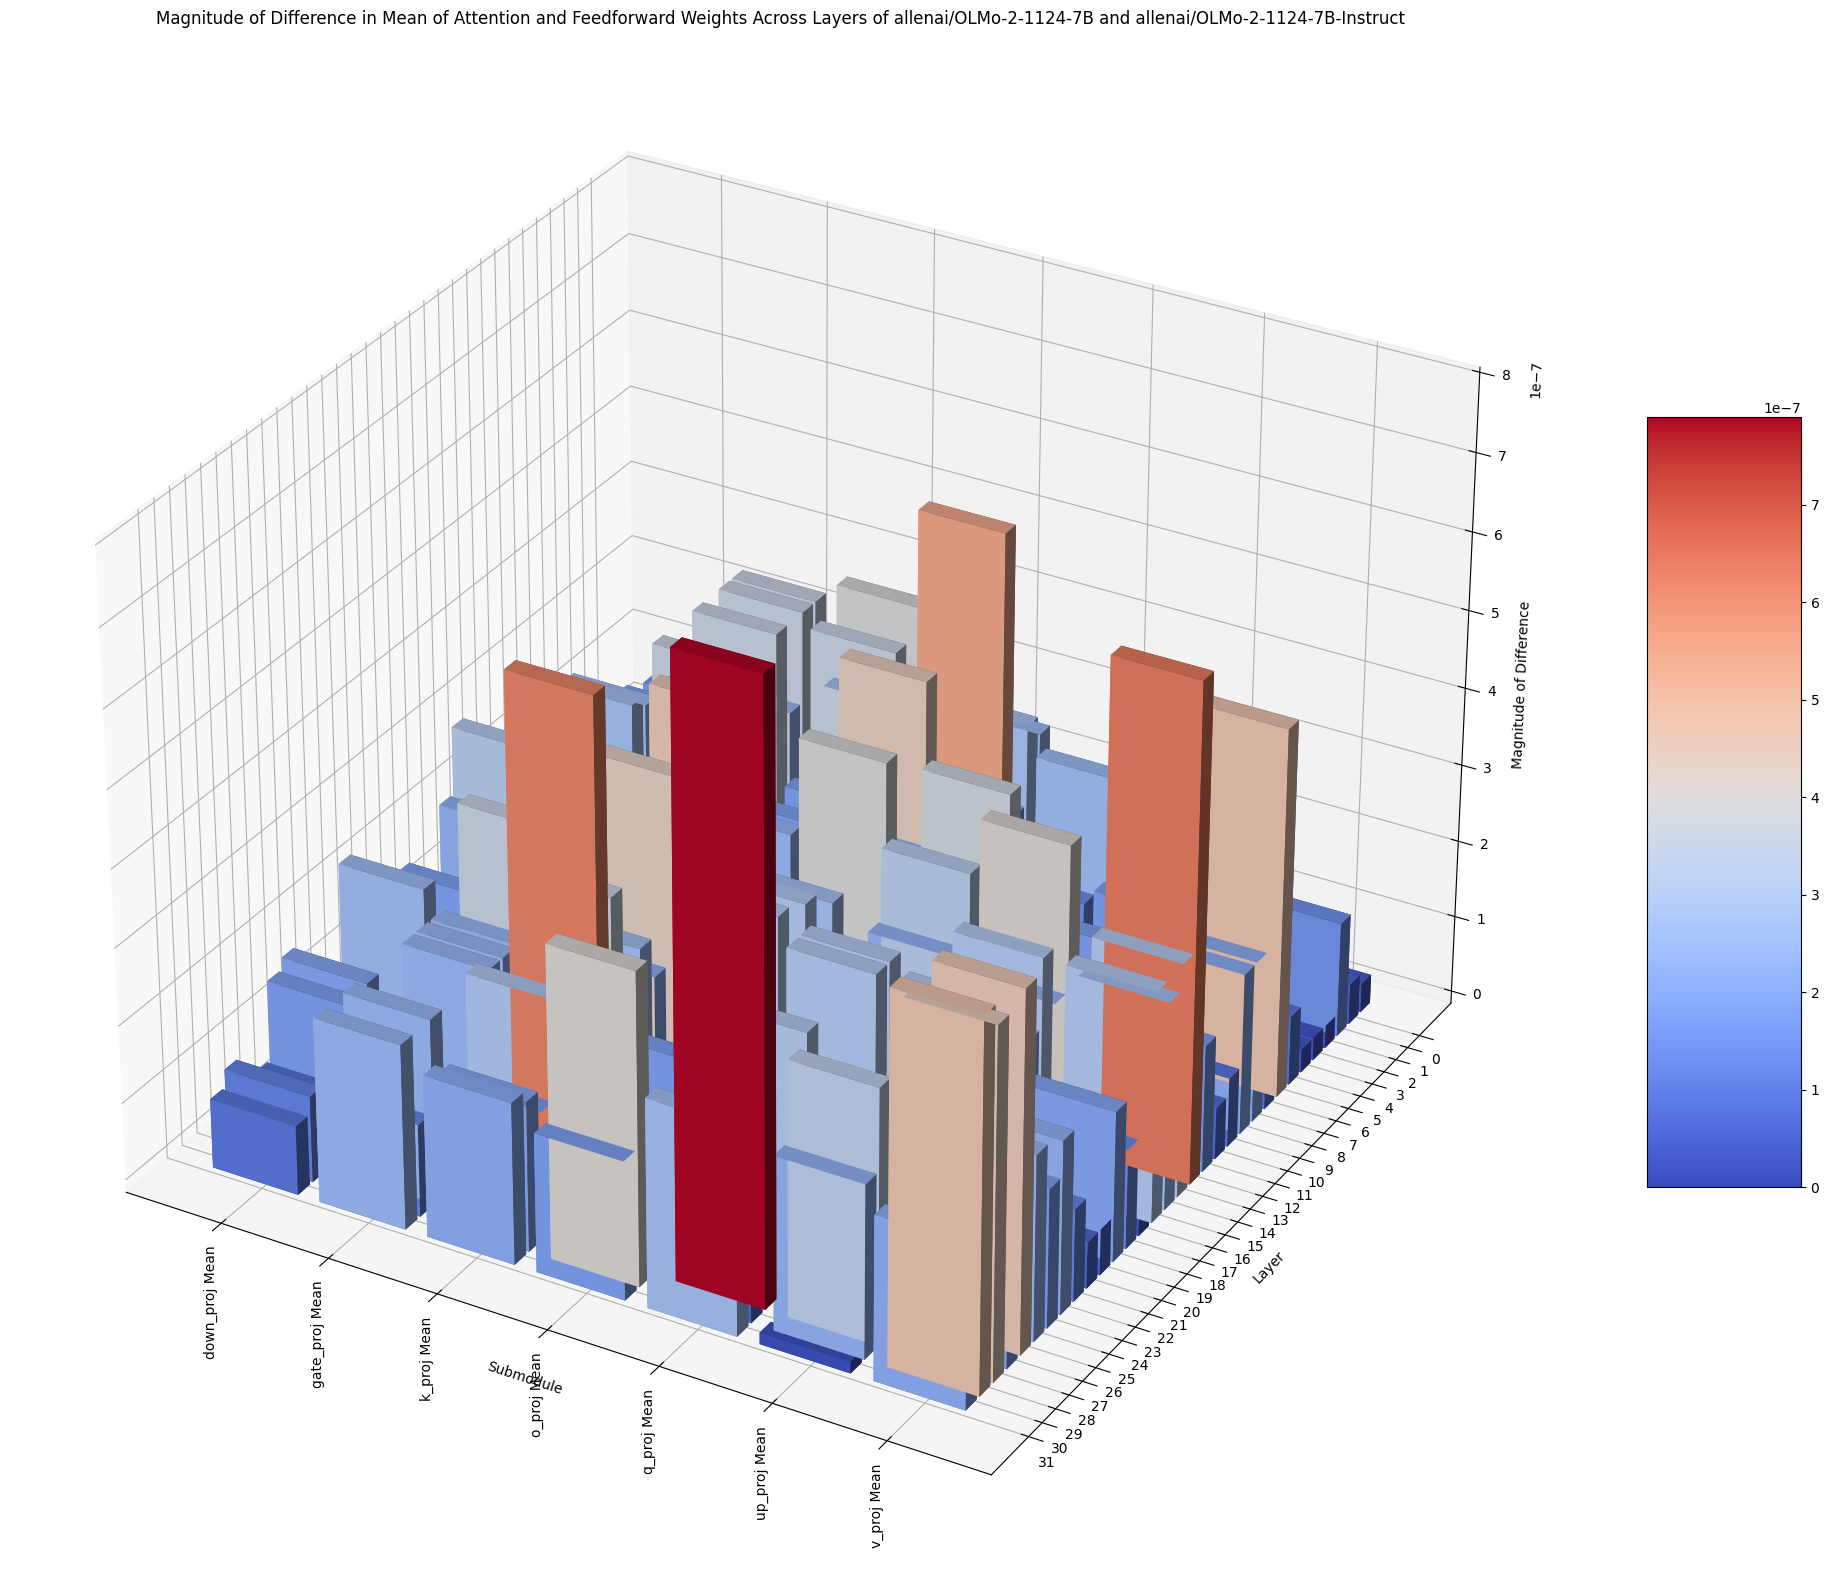

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for 3D plotting
x_labels = diff_pivot_df.columns
y_labels = diff_pivot_df.index
x = np.arange(len(x_labels))
y = np.arange(len(y_labels))
x, y = np.meshgrid(x, y)
z = np.zeros_like(x, dtype=float)
dx = dy = 0.8  # Adjusted bar width and depth
dz = diff_pivot_df.values

# Normalize the dz values for colormap
norm = plt.Normalize(dz.min(), dz.max())
colors = cm.coolwarm(norm(dz.flatten()))

# Plot the data in 3D
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x.flatten(), y.flatten(), z.flatten(), dx, dy, dz.flatten(), color=colors, shade=True)

# Set the ticks and labels correctly
ax.set_xticks(np.arange(len(x_labels)) + dx / 2)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_yticks(np.arange(len(y_labels)) + dy / 2)
ax.set_yticklabels(y_labels)

ax.set_xlabel('Submodule')
ax.set_ylabel('Layer')
ax.set_zlabel('Magnitude of Difference')

# Add a color bar which maps values to colors
mappable = cm.ScalarMappable(norm=norm, cmap='coolwarm')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)

plt.title('Magnitude of Difference in Mean of Attention and Feedforward Weights Across Layers of ' + model_id + ' and ' + finetuned_model_id)
plt.savefig('figures/summary_stats/' + model_id + '_vs_instruct_magnitude_3d_colormap.pdf')
plt.show()

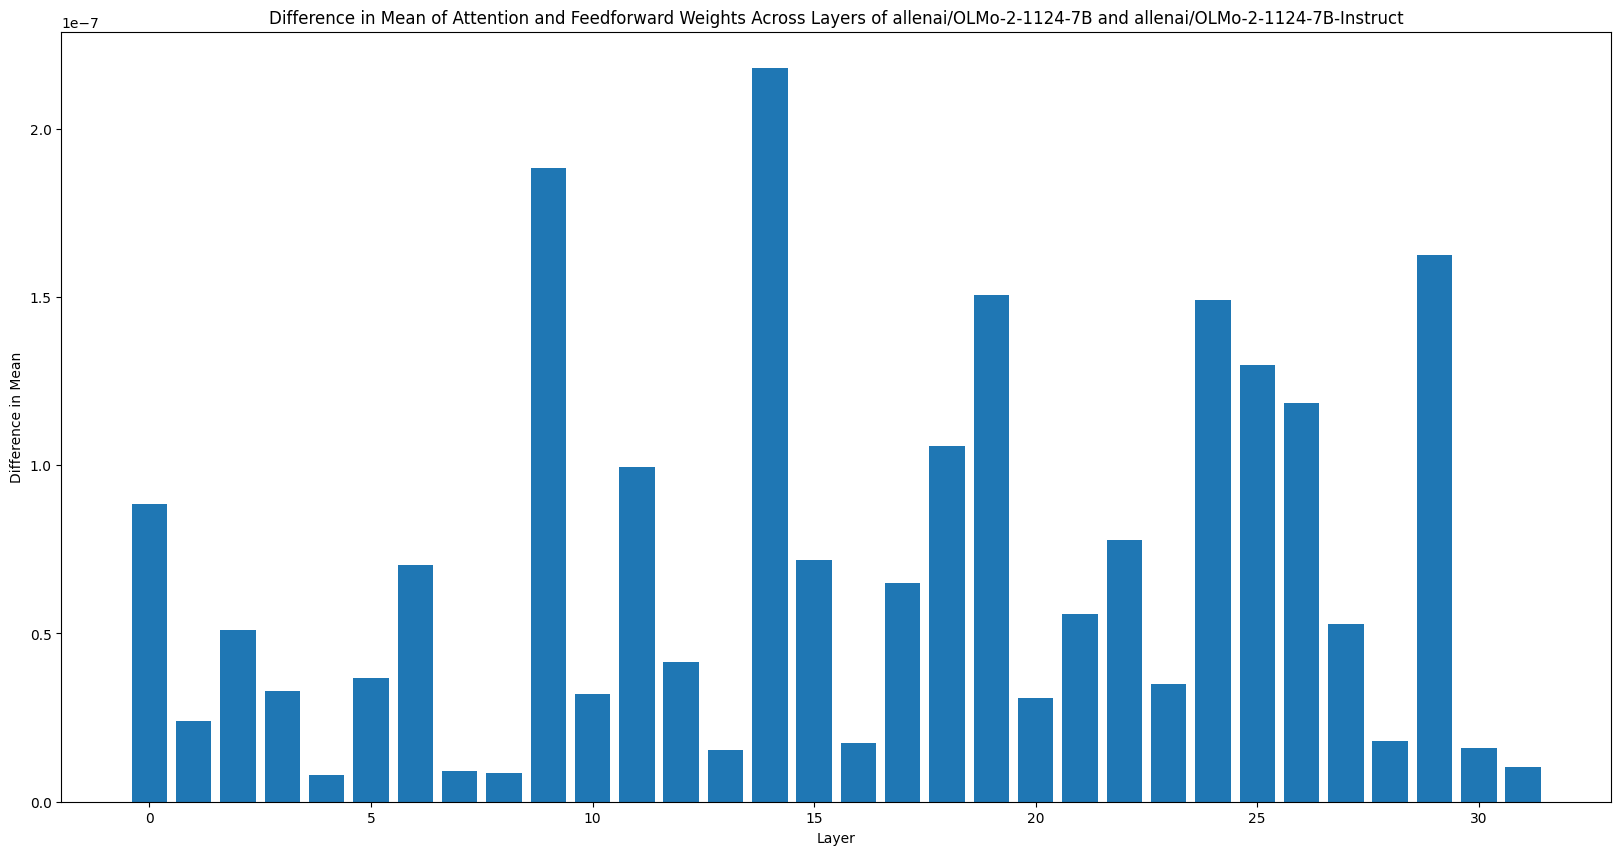

In [11]:
# quick and dirty second graph that does the same thing but collapses all submodules and calculates their average
# lets first calculate the average of the means across submodules
avg_means = np.mean(means, axis=1)
avg_finetuned_means = np.mean(finetuned_means, axis=1)
# now calculate the differences
diff_avg_means = abs(avg_means - avg_finetuned_means)
# plot the differences. use the same plot style as above
plt.figure(figsize=(20, 10))
plt.bar(range(len(diff_avg_means)), diff_avg_means)
plt.title('Difference in Mean of Attention and Feedforward Weights Across Layers of ' + model_id + ' and ' + finetuned_model_id)
plt.xlabel('Layer')
plt.ylabel('Difference in Mean')
plt.savefig('figures/summary_stats/' + model_id + '_vs_instruct_avg.pdf')

In [13]:
model

Olmo2ForCausalLM(
  (model): Olmo2Model(
    (embed_tokens): Embedding(100352, 4096, padding_idx=100277)
    (layers): ModuleList(
      (0-31): 32 x Olmo2DecoderLayer(
        (self_attn): Olmo2SdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): Olmo2RotaryEmbedding()
          (q_norm): Olmo2RMSNorm((4096,), eps=1e-06)
          (k_norm): Olmo2RMSNorm((4096,), eps=1e-06)
        )
        (mlp): Olmo2MLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (post_attention